# Data Processing (통계적 분석)
- 상관관계가 큰 변수 찾기
- 결측치 처리
- 이상치 처리
- 로그 변환
- 데이터 (주택가격 예측 데이터)
- https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## data analysis and cleaning
- correlation
- missing values
- using house saleprice estimation

In [2]:
df = pd.read_csv('./data/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.shape

(1460, 81)

### analyze target variable
- statistic analysis
- distribution and histogram

In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


(array([  5.,  11.,  13.,  61.,  58., 126., 165., 180., 122., 130., 121.,
         78.,  61.,  64.,  49.,  36.,  36.,  25.,  13.,  25.,  16.,  11.,
          4.,  11.,   9.,   5.,   4.,   4.,   4.,   2.,   1.,   1.,   1.,
          0.,   1.,   0.,   2.,   0.,   1.,   0.,   2.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   2.]),
 array([ 34900.,  49302.,  63704.,  78106.,  92508., 106910., 121312.,
        135714., 150116., 164518., 178920., 193322., 207724., 222126.,
        236528., 250930., 265332., 279734., 294136., 308538., 322940.,
        337342., 351744., 366146., 380548., 394950., 409352., 423754.,
        438156., 452558., 466960., 481362., 495764., 510166., 524568.,
        538970., 553372., 567774., 582176., 596578., 610980., 625382.,
        639784., 654186., 668588., 682990., 697392., 711794., 726196.,
        740598., 755000.]),
 <a list of 50 Patch objects>)

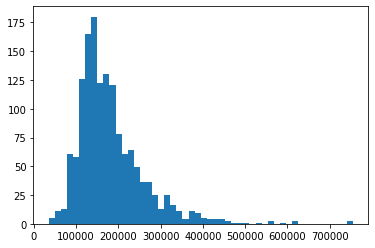

In [6]:
plt.hist(df['SalePrice'], bins=50)

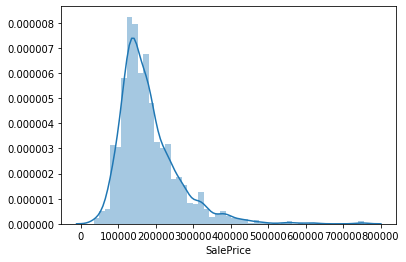

In [7]:
sns.distplot(df['SalePrice'], kde=True); # kde - kernel density estimation

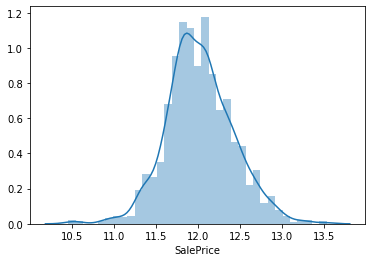

In [8]:
sns.distplot(np.log1p(df['SalePrice']), kde=True)  # log-normal dist

### objctive analysis
- correlation (heatmap and matrix)
- Scatter plots between the most correlated variables

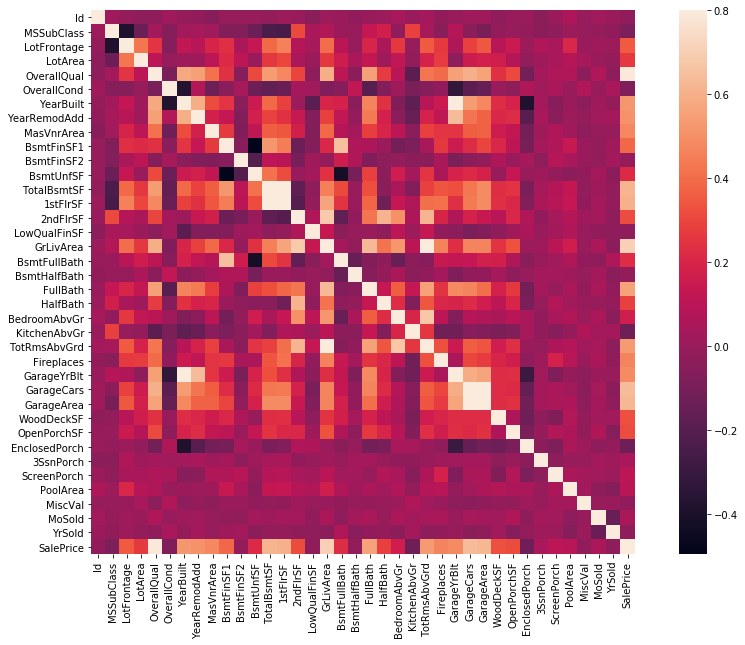

In [10]:
corrmat = df.corr()

f, ax = plt.subplots(figsize=(16, 10))
sns.heatmap(corrmat, vmax=.8, square=True);

In [12]:
corrmat.sort_values(by='SalePrice', ascending=False).T

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,...,BsmtFinSF2,BsmtHalfBath,MiscVal,Id,LowQualFinSF,YrSold,OverallCond,MSSubClass,EnclosedPorch,KitchenAbvGr
Id,-0.021917,-0.028365,0.008273,0.016570,0.017634,-0.015415,0.010496,0.005587,0.027239,-0.012713,...,-0.005968,-0.020155,-0.006242,1.000000,-0.044230,0.000712,0.012609,0.011156,0.002889,0.002951
MSSubClass,-0.084284,0.032628,0.074853,-0.040110,-0.098672,-0.238518,-0.251758,0.131608,0.040380,0.027850,...,-0.065649,-0.002333,-0.007683,0.011156,0.046474,-0.021407,-0.059316,1.000000,-0.012037,0.281721
LotFrontage,0.351799,0.251646,0.402797,0.285691,0.344997,0.392075,0.457181,0.198769,0.352096,0.123349,...,0.049900,-0.007234,0.003368,-0.010601,0.038469,0.007450,-0.059213,-0.386347,0.010700,-0.006069
LotArea,0.263843,0.105806,0.263116,0.154871,0.180403,0.260833,0.299475,0.126031,0.190015,0.014228,...,0.111170,0.048046,0.038068,-0.033226,0.004779,-0.014261,-0.005636,-0.139781,-0.018340,-0.017784
OverallQual,0.790982,1.000000,0.593007,0.600671,0.562022,0.537808,0.476224,0.550600,0.427452,0.572323,...,-0.059119,-0.040150,-0.031406,-0.028365,-0.030429,-0.027347,-0.091932,0.032628,-0.113937,-0.183882
OverallCond,-0.077856,-0.091932,-0.079686,-0.185758,-0.151521,-0.171098,-0.144203,-0.194149,-0.057583,-0.375983,...,0.040229,0.117821,0.068777,0.012609,0.025494,0.043950,1.000000,-0.059316,0.070356,-0.087001
YearBuilt,0.522897,0.572323,0.199010,0.537850,0.478954,0.391452,0.281986,0.468271,0.095589,1.000000,...,-0.049107,-0.038162,-0.034383,-0.012713,-0.183784,-0.013618,-0.375983,0.027850,-0.387268,-0.174800
YearRemodAdd,0.507101,0.550684,0.287389,0.420622,0.371600,0.291066,0.240379,0.439046,0.191740,0.592855,...,-0.067759,-0.012337,-0.010286,-0.021998,-0.062419,0.035743,0.073741,0.040581,-0.193919,-0.149598
MasVnrArea,0.477493,0.411876,0.390857,0.364204,0.373066,0.363936,0.344501,0.276833,0.280682,0.315707,...,-0.072319,0.026673,-0.029815,-0.050298,-0.069071,-0.008201,-0.128101,0.022936,-0.110204,-0.037610
BsmtFinSF1,0.386420,0.239666,0.208171,0.224054,0.296970,0.522396,0.445863,0.058543,0.044316,0.249503,...,-0.050117,0.067418,0.003571,-0.005024,-0.064503,0.014359,-0.046231,-0.069836,-0.102303,-0.081007


In [13]:
k=7
cols = corrmat.nlargest(k, 'SalePrice')
cols

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
SalePrice,-0.021917,-0.084284,0.351799,0.263843,0.790982,-0.077856,0.522897,0.507101,0.477493,0.386420,...,0.324413,0.315856,-0.128578,0.044584,0.111447,0.092404,-0.021190,0.046432,-0.028923,1.000000
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
GrLivArea,0.008273,0.074853,0.402797,0.263116,0.593007,-0.079686,0.199010,0.287389,0.390857,0.208171,...,0.247433,0.330224,0.009113,0.020643,0.101510,0.170205,-0.002416,0.050240,-0.036526,0.708624
GarageCars,0.016570,-0.040110,0.285691,0.154871,0.600671,-0.185758,0.537850,0.420622,0.364204,0.224054,...,0.226342,0.213569,-0.151434,0.035765,0.050494,0.020934,-0.043080,0.040522,-0.039117,0.640409
GarageArea,0.017634,-0.098672,0.344997,0.180403,0.562022,-0.151521,0.478954,0.371600,0.373066,0.296970,...,0.224666,0.241435,-0.121777,0.035087,0.051412,0.061047,-0.027400,0.027974,-0.027378,0.623431
TotalBsmtSF,-0.015415,-0.238518,0.392075,0.260833,0.537808,-0.171098,0.391452,0.291066,0.363936,0.522396,...,0.232019,0.247264,-0.095478,0.037384,0.084489,0.126053,-0.018479,0.013196,-0.014969,0.613581
1stFlrSF,0.010496,-0.251758,0.457181,0.299475,0.476224,-0.144203,0.281986,0.240379,0.344501,0.445863,...,0.235459,0.211671,-0.065292,0.056104,0.088758,0.131525,-0.021096,0.031372,-0.013604,0.605852


- scatter graph (target variable and numerical data feature)

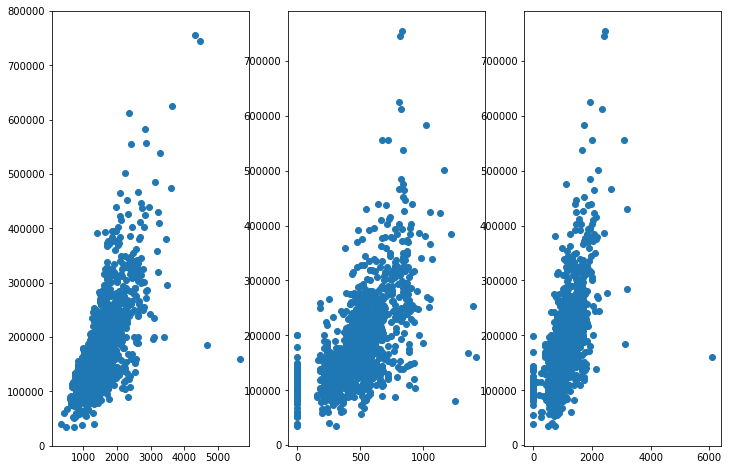

In [14]:
var1 = 'GrLivArea'
var2 = 'GarageArea'
var3 = 'TotalBsmtSF'

plt.figure(figsize=(12,8))
plt.subplot(1, 3, 1)
plt.ylim(0, 800000)
plt.scatter(df[var1], df.SalePrice)
plt.subplot(1, 3, 2)
plt.scatter(df[var2], df.SalePrice)
plt.subplot(1, 3, 3)
plt.scatter(df[var3], df.SalePrice)

- target variable and categorical feature (boxplot is better)

In [15]:
print(df.shape)
print(df['OverallQual'].unique())
print(df['OverallQual'].dtypes)
df['OverallQual'].value_counts()

(1460, 81)
[ 7  6  8  5  9  4 10  3  1  2]
int64


5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

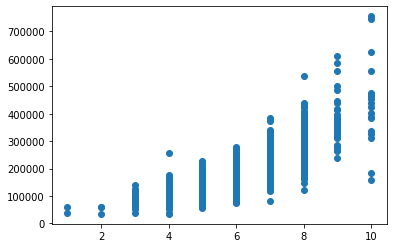

In [16]:
plt.scatter(df.OverallQual, df.SalePrice);

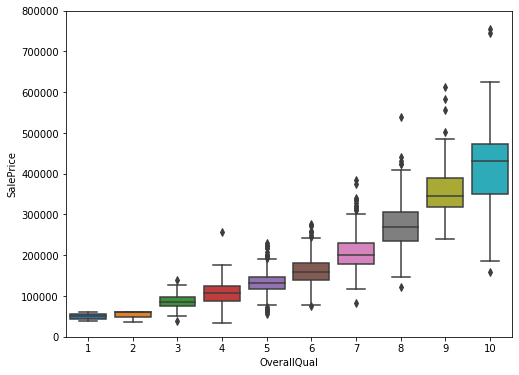

In [17]:
plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=df)
fig.axis(ymin=0, ymax=800000);

In [19]:
df['GarageCars'].unique()

array([2, 3, 1, 0, 4], dtype=int64)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111]),
 <a list of 112 Text xticklabel objects>)

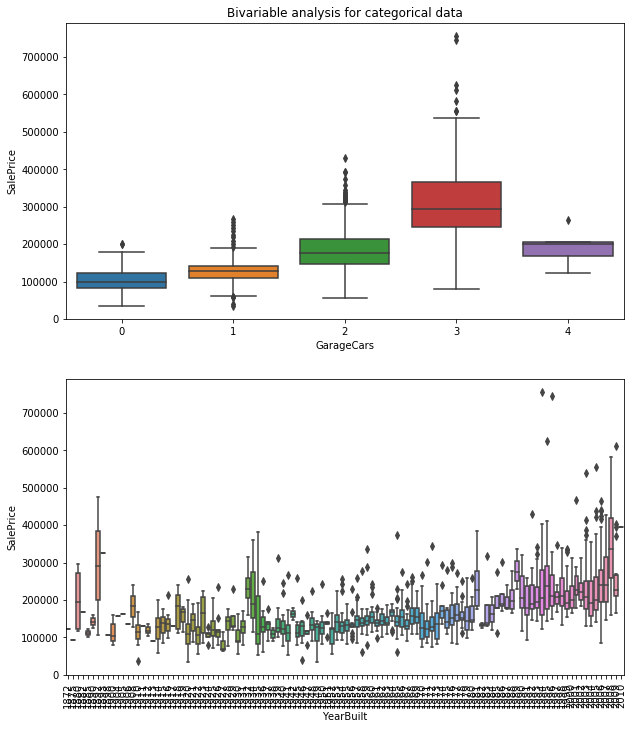

In [20]:
plt.figure(figsize=(10,12))
plt.subplot(2,1,1)
plt.title('Bivariable analysis for categorical data')
sns.boxplot(data=df, x='GarageCars', y='SalePrice')
plt.subplot(2,1,2)
sns.boxplot(data=df, x='YearBuilt', y='SalePrice')
plt.xticks(rotation=90)

- we found that 
  - positive correlation between target and 'OverallQual'
  - not strictly positive (weak) correlation between target and 'GarageCars' and 'YearBuilt'

In [21]:
cols = cols['SalePrice'].index
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF'],
      dtype='object')

In [22]:
cm = df[cols].corr()

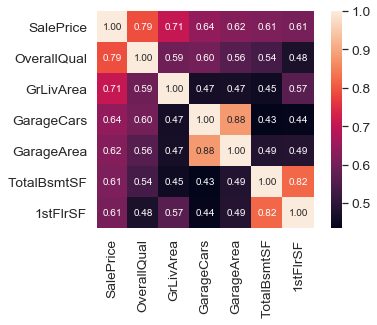

In [23]:
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
        fmt='.2f', annot_kws={'size': 10}, 
        yticklabels=cols.values, xticklabels=cols.values)
plt.show()

C:\Users\rtaje\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


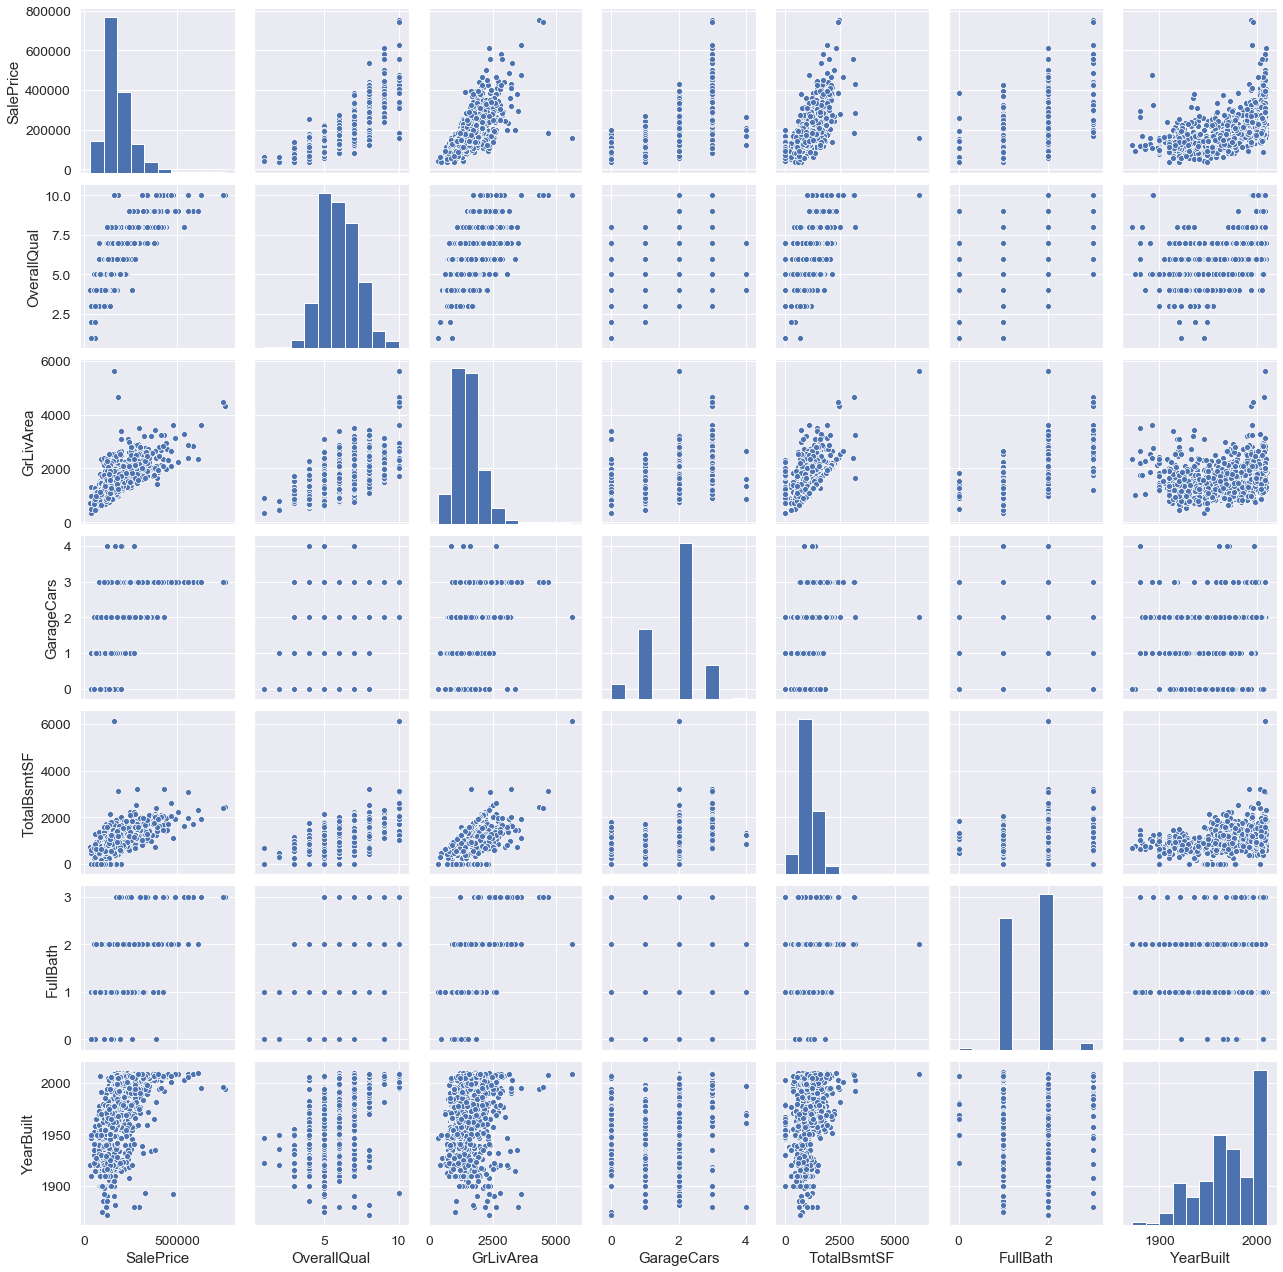

In [24]:
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 
        'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df[cols], size = 2.5)
plt.show();

### Missing Values

In [26]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [30]:
df.isna().sum().sort_values(ascending=False)

PoolQC           1453
MiscFeature      1406
Alley            1369
Fence            1179
FireplaceQu       690
                 ... 
CentralAir          0
SaleCondition       0
Heating             0
TotalBsmtSF         0
Id                  0
Length: 81, dtype: int64

In [32]:
# or
df.count().sort_values()   # count non-NA cells

PoolQC            7
MiscFeature      54
Alley            91
Fence           281
FireplaceQu     770
               ... 
Exterior1st    1460
RoofMatl       1460
RoofStyle      1460
Foundation     1460
SalePrice      1460
Length: 81, dtype: int64

In [33]:
total = df.isna().sum().sort_values(ascending=False)

In [34]:
percent = (df.isna().sum()/df.shape[0]).sort_values(ascending=False)

In [35]:
percent

PoolQC           0.995205
MiscFeature      0.963014
Alley            0.937671
Fence            0.807534
FireplaceQu      0.472603
                   ...   
CentralAir       0.000000
SaleCondition    0.000000
Heating          0.000000
TotalBsmtSF      0.000000
Id               0.000000
Length: 81, dtype: float64

In [36]:
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

In [37]:
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [38]:
garages = ['GarageCond','GarageType','GarageYrBlt','GarageFinish','GarageQual', 'GarageCars', 'GarageArea']
bsmts = ['BsmtExposure','BsmtFinType2','BsmtFinType1','BsmtCond','BsmtQual']
print(df[garages].describe())
df[garages].info()

       GarageYrBlt   GarageCars   GarageArea
count  1379.000000  1460.000000  1460.000000
mean   1978.506164     1.767123   472.980137
std      24.689725     0.747315   213.804841
min    1900.000000     0.000000     0.000000
25%    1961.000000     1.000000   334.500000
50%    1980.000000     2.000000   480.000000
75%    2002.000000     2.000000   576.000000
max    2010.000000     4.000000  1418.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GarageCond    1379 non-null   object 
 1   GarageType    1379 non-null   object 
 2   GarageYrBlt   1379 non-null   float64
 3   GarageFinish  1379 non-null   object 
 4   GarageQual    1379 non-null   object 
 5   GarageCars    1460 non-null   int64  
 6   GarageArea    1460 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 80.0+ KB


In [40]:
df[garages].describe(include=['O'])   # 'all'

,GarageCond,GarageType,GarageFinish,GarageQual
count,1379,1379,1379,1379
unique,5,6,3,5
top,TA,Attchd,Unf,TA
freq,1326,870,605,1311


In [41]:
df[garages].describe(include='all')

,GarageCond,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCars,GarageArea
count,1379,1379,1379.000000,1379,1379,1460.000000,1460.000000
unique,5,6,NaN,3,5,NaN,NaN
top,TA,Attchd,NaN,Unf,TA,NaN,NaN
freq,1326,870,NaN,605,1311,NaN,NaN
mean,NaN,NaN,1978.506164,NaN,NaN,1.767123,472.980137
std,NaN,NaN,24.689725,NaN,NaN,0.747315,213.804841
min,NaN,NaN,1900.000000,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,1961.000000,NaN,NaN,1.000000,334.500000
50%,NaN,NaN,1980.000000,NaN,NaN,2.000000,480.000000
75%,NaN,NaN,2002.000000,NaN,NaN,2.000000,576.000000


In [33]:
# object(string) variables
print(df['GarageCond'].unique())
print(df['GarageType'].unique())
print(df['GarageFinish'].unique())
print(df['GarageQual'].unique())

['TA' 'Fa' nan 'Gd' 'Po' 'Ex']
['Attchd' 'Detchd' 'BuiltIn' 'CarPort' nan 'Basment' '2Types']
['RFn' 'Unf' 'Fin' nan]
['TA' 'Fa' 'Gd' nan 'Ex' 'Po']


In [34]:
df[garages].select_dtypes(include=['object'])

,GarageCond,GarageType,GarageFinish,GarageQual
0,TA,Attchd,RFn,TA
1,TA,Attchd,RFn,TA
2,TA,Attchd,RFn,TA
3,TA,Detchd,Unf,TA
4,TA,Attchd,RFn,TA
...,...,...,...,...
1455,TA,Attchd,RFn,TA
1456,TA,Attchd,Unf,TA
1457,TA,Attchd,RFn,TA
1458,TA,Attchd,Unf,TA


In [35]:
df2 = df.copy()
df2['GarageCond'].unique()

array(['TA', 'Fa', nan, 'Gd', 'Po', 'Ex'], dtype=object)

In [36]:
df2 = pd.concat([df[garages], df['SalePrice']], axis=1)

In [37]:
df2.head()

,GarageCond,GarageType,GarageYrBlt,GarageFinish,GarageQual,GarageCars,GarageArea,SalePrice
0,TA,Attchd,2003.0,RFn,TA,2,548,208500
1,TA,Attchd,1976.0,RFn,TA,2,460,181500
2,TA,Attchd,2001.0,RFn,TA,2,608,223500
3,TA,Detchd,1998.0,Unf,TA,3,642,140000
4,TA,Attchd,2000.0,RFn,TA,3,836,250000


In [38]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GarageCond    1379 non-null   object 
 1   GarageType    1379 non-null   object 
 2   GarageYrBlt   1379 non-null   float64
 3   GarageFinish  1379 non-null   object 
 4   GarageQual    1379 non-null   object 
 5   GarageCars    1460 non-null   int64  
 6   GarageArea    1460 non-null   int64  
 7   SalePrice     1460 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 91.4+ KB


In [39]:
df2 = df2.dropna()
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1379 entries, 0 to 1459
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GarageCond    1379 non-null   object 
 1   GarageType    1379 non-null   object 
 2   GarageYrBlt   1379 non-null   float64
 3   GarageFinish  1379 non-null   object 
 4   GarageQual    1379 non-null   object 
 5   GarageCars    1379 non-null   int64  
 6   GarageArea    1379 non-null   int64  
 7   SalePrice     1379 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 97.0+ KB


In [40]:
from sklearn.preprocessing import LabelEncoder
df2['GarageCond'] = LabelEncoder().fit_transform(df2['GarageCond'])
df2['GarageType'] = LabelEncoder().fit_transform(df2['GarageType'])
df2['GarageFinish'] = LabelEncoder().fit_transform(df2['GarageFinish'])
df2['GarageQual'] = LabelEncoder().fit_transform(df2['GarageQual'])

In [41]:
df2.dtypes

GarageCond        int32
GarageType        int32
GarageYrBlt     float64
GarageFinish      int32
GarageQual        int32
GarageCars        int64
GarageArea        int64
SalePrice         int64
dtype: object

C:\Anaconda\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


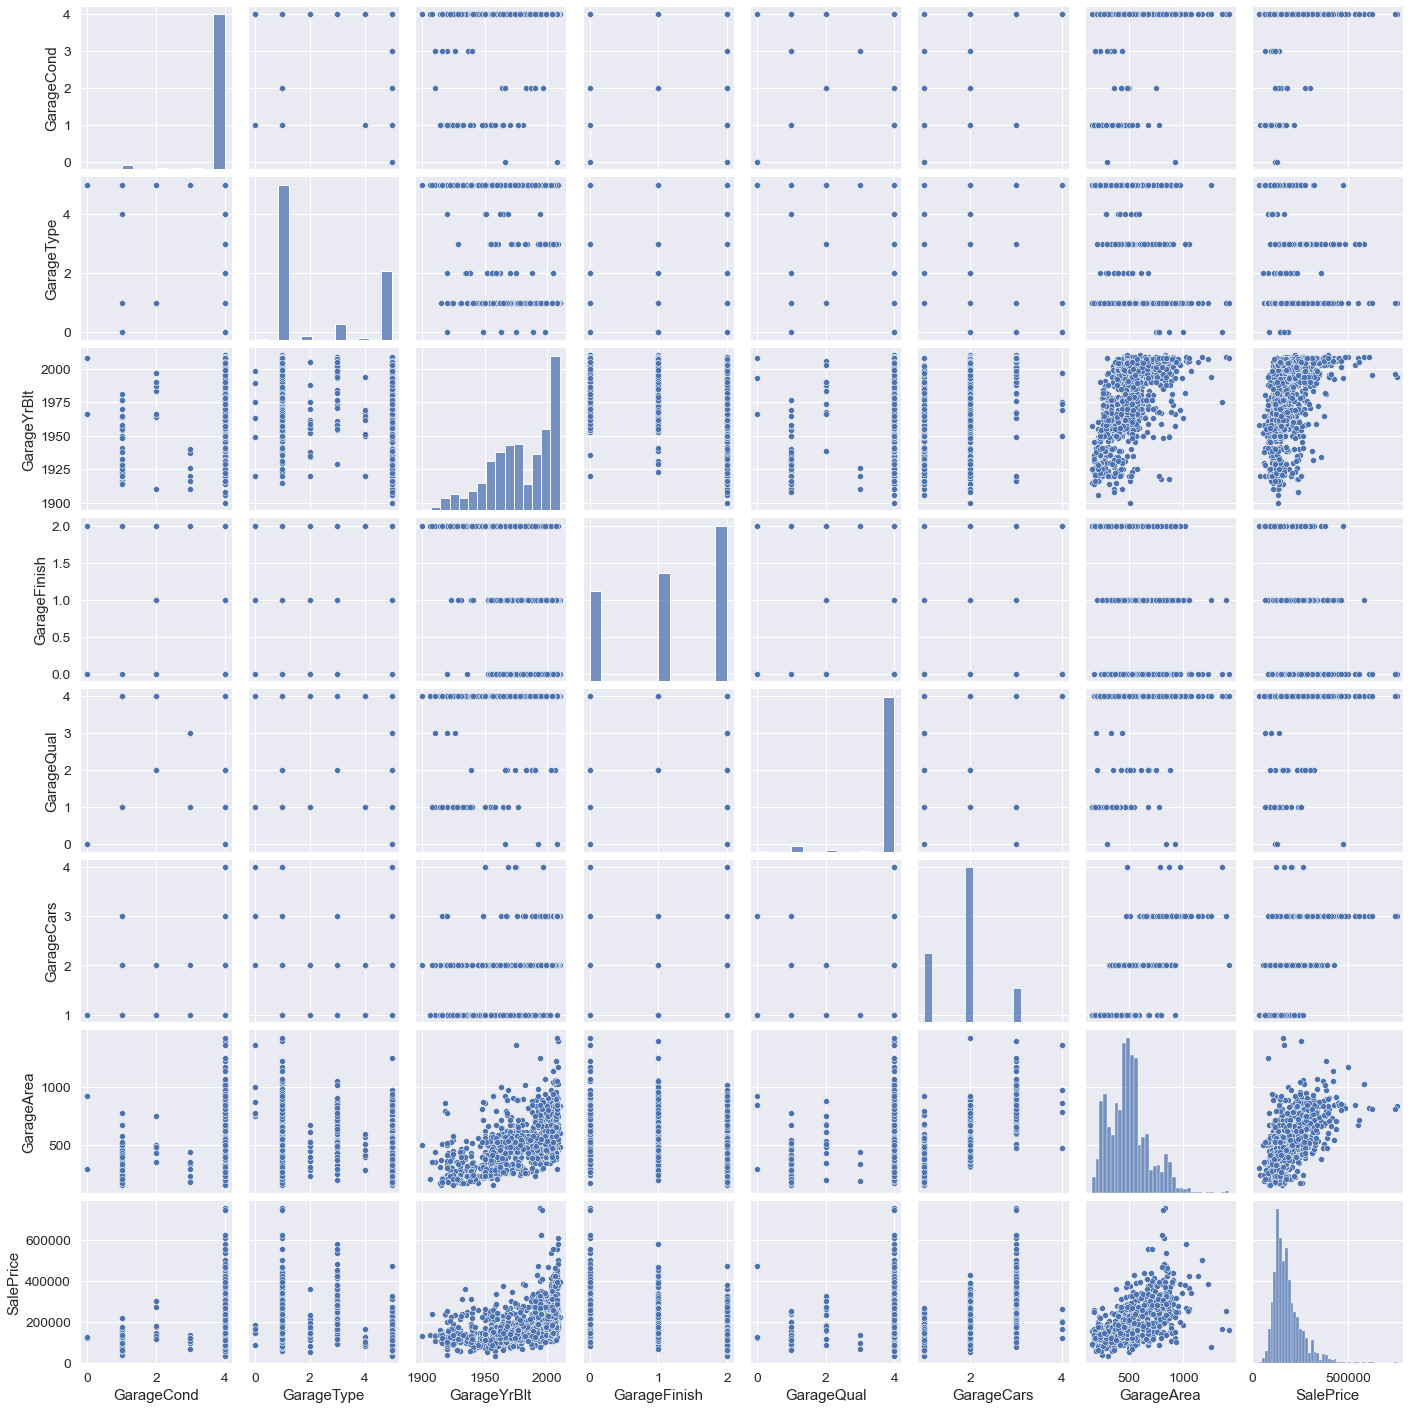

In [42]:
sns.pairplot(df2, size = 2.5)

In [43]:
df[bsmts].select_dtypes(include=['object'])

,BsmtExposure,BsmtFinType2,BsmtFinType1,BsmtCond,BsmtQual
0,No,Unf,GLQ,TA,Gd
1,Gd,Unf,ALQ,TA,Gd
2,Mn,Unf,GLQ,TA,Gd
3,No,Unf,ALQ,Gd,TA
4,Av,Unf,GLQ,TA,Gd
...,...,...,...,...,...
1455,No,Unf,Unf,TA,Gd
1456,No,Rec,ALQ,TA,Gd
1457,No,Unf,GLQ,Gd,TA
1458,Mn,Rec,GLQ,TA,TA


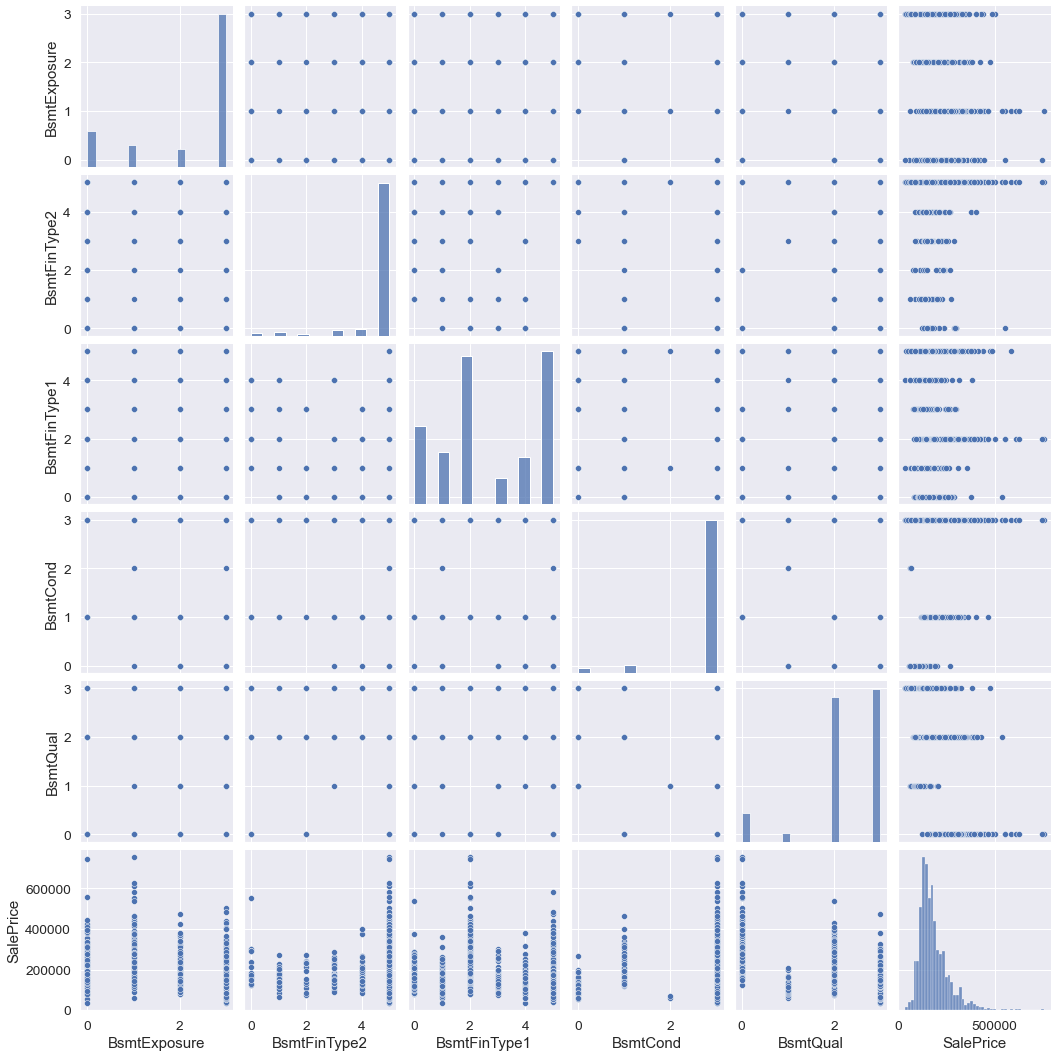

In [46]:
df2 = df.copy()
df2 = pd.concat([df[bsmts], df['SalePrice']], axis=1)
df2 = df2.dropna()
df2['BsmtExposure'] = LabelEncoder().fit_transform(df2['BsmtExposure'])
df2['BsmtFinType2'] = LabelEncoder().fit_transform(df2['BsmtFinType2'])
df2['BsmtFinType1'] = LabelEncoder().fit_transform(df2['BsmtFinType1'])
df2['BsmtCond'] = LabelEncoder().fit_transform(df2['BsmtCond'])
df2['BsmtQual'] = LabelEncoder().fit_transform(df2['BsmtQual'])
sns.pairplot(df2, height = 2.5)

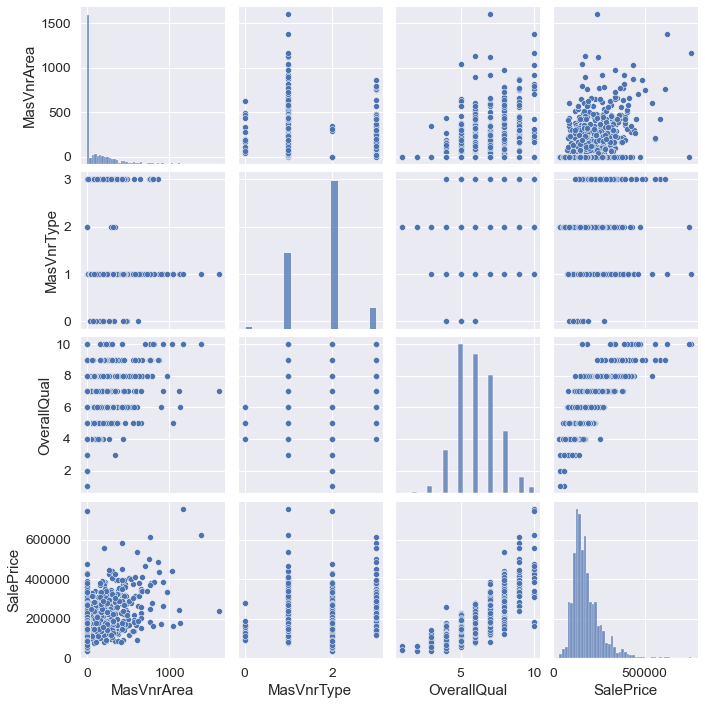

In [47]:
df2 = df[['MasVnrArea', 'MasVnrType', 'OverallQual', 'SalePrice']]
df2 = df2.dropna()
df2['MasVnrType'] = LabelEncoder().fit_transform(df2['MasVnrType'])
sns.pairplot(df2, height = 2.5)

###  make strategy (cleaning)
- missing rate greater than 15% - remove features
- keep Garages\* and Bsmt\*
- keep MasVnr\*.

In [43]:
new_df = df.copy()
new_df = new_df.drop((missing_data[missing_data['Total'] > 100]).index, axis=1)
new_df = new_df.dropna()
print(new_df.shape, df.shape)
print(new_df.isna().sum().max())

(1338, 75) (1460, 81)
0


### Outliers
- bivariate analysis

In [44]:
from sklearn.preprocessing import StandardScaler

In [45]:
sc = StandardScaler()
saleprice_scaled = sc.fit_transform(np.array(new_df['SalePrice']).reshape(-1,1))
saleprice_scaled

array([[ 0.27557072],
       [-0.06670249],
       [ 0.46572249],
       ...,
       [ 1.01082426],
       [-0.56585091],
       [-0.49771319]])

In [51]:
saleprice_scaled[:, 0]

array([ 0.27557072, -0.06670249,  0.46572249, ...,  1.01082426,
       -0.56585091, -0.49771319])

In [46]:
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
low_range, high_range

(array([[-1.91990905],
        [-1.8604676 ],
        [-1.65772778],
        [-1.62594708],
        [-1.6069319 ],
        [-1.6069319 ],
        [-1.57672312],
        [-1.54988636],
        [-1.52453279],
        [-1.5181944 ]]),
 array([[3.78070184],
        [3.99414088],
        [4.45257146],
        [4.66807681],
        [4.68811881],
        [5.02217745],
        [5.38630543],
        [5.55545178],
        [7.07666601],
        [7.20343387]]))

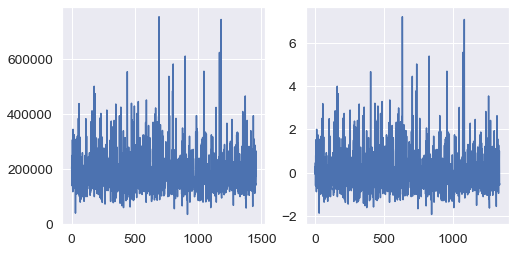

In [47]:
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(new_df['SalePrice'])  #  if not shown, x-axis is default len(y)
plt.subplot(1,2,2)
plt.plot(saleprice_scaled)
plt.show()

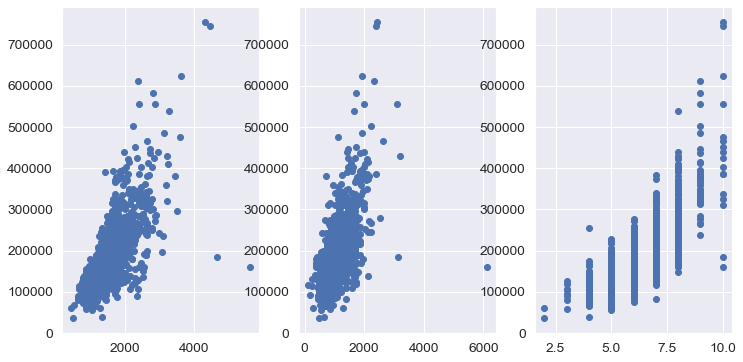

In [48]:
var1 = 'GrLivArea'    # most significant nominal features
var2 = 'TotalBsmtSF'
var3 = 'OverallQual'
plt.figure(figsize=(12,6))
plt.subplot(1, 3, 1)
plt.scatter(new_df[var1], new_df['SalePrice'])
plt.subplot(1, 3, 2)
plt.scatter(new_df[var2], new_df['SalePrice'])
plt.subplot(1, 3, 3)
plt.scatter(new_df[var3], new_df['SalePrice'])


- top two points: greater than 7, but keep the trend
- rightmost two points:  remove

In [49]:
# deleting points
new_df.sort_values(by='GrLivArea', ascending=False)[:2]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750


In [50]:
new_df.sort_values(by='TotalBsmtSF', ascending=False)[:5]

,Id,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1298,1299,60,RL,63887,Pave,IR3,Bnk,AllPub,Corner,Gtl,...,0,0,0,480,0,1,2008,New,Partial,160000
496,497,20,RL,12692,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,291,0,0,0,0,5,2007,WD,Normal,430000
523,524,60,RL,40094,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,0,0,0,0,0,10,2007,New,Partial,184750
440,441,20,RL,15431,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,170,0,0,4,2009,WD,Normal,555000
1373,1374,20,RL,11400,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,3,2007,WD,Normal,466500


In [51]:
new_df = new_df.drop(new_df[new_df['Id'] == 1299].index)
new_df = new_df.drop(new_df[new_df['Id'] == 524].index)
new_df.shape

(1336, 75)

### Compare before and after preprocessing
- use 5 most significant features
- use all features (need categorical encoding)



In [52]:
df.shape, new_df.shape

((1460, 81), (1336, 75))

In [77]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
# np.random.seed(42)
corrmat = df.corr()
cols = corrmat.nlargest(5, 'SalePrice')
print(cols.index)
df3 = df[cols.index]
X, y = df3.values[:, 1:], df3.values[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
print("Before the data cleaning: ", model.score(X_test, y_test))

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea'], dtype='object')
Before the data cleaning:  0.7578131202052459


In [93]:
# np.random.seed(42)
corrmat = new_df.corr()
cols = corrmat.nlargest(5, 'SalePrice')
print(cols.index)
df3 = new_df[cols.index]
X, y = df3.values[:, 1:], df3.values[:, 0]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
print("After the data cleaning: ", model.score(X_test, y_test))

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'GarageCars'], dtype='object')
After the data cleaning:  0.8179602452381776


In [94]:
# use all features

df.shape, new_df.shape

((1460, 81), (1336, 75))

In [95]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [96]:
new_df.dtypes

Id                int64
MSSubClass        int64
MSZoning         object
LotArea           int64
Street           object
                  ...  
MoSold            int64
YrSold            int64
SaleType         object
SaleCondition    object
SalePrice         int64
Length: 75, dtype: object

In [97]:
df3 = new_df.copy()
for i in range(1, len(df3.dtypes)-1):
    if df3.dtypes[i] == 'object':
        df3.iloc[:,i] = LabelEncoder().fit_transform(df3.iloc[:,i])

In [98]:
(df3.dtypes == 'object').sum()

0

In [99]:
df3.columns[-1]

'SalePrice'

In [119]:
# np.random.seed(42)
X, y = df3.values[:, 1:-1], df3.values[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
print("Using all the features: ", model.score(X_test, y_test))

Using all the features:  0.8851719262014124


In [101]:
df4 = new_df.copy()
obj_cols = df4.select_dtypes(include=['object']).columns

In [102]:
obj_cols

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [103]:
df4.shape

(1336, 75)

In [104]:
df4 = pd.get_dummies(df4, columns=obj_cols)
df4.shape

(1336, 265)

In [105]:
df4.columns[-1]

'SaleCondition_Partial'

In [106]:
df4['SalePrice'].values

array([208500, 181500, 223500, ..., 266500, 142125, 147500], dtype=int64)

In [137]:
# np.random.seed(17)
X, y = df4.drop(['Id','SalePrice'], axis=1).values, df4['SalePrice'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
print("Using all the features (onehot encoding): ", model.score(X_test, y_test))

Using all the features (onehot encoding):  0.8996842616400831


# Cleaning 2
- use logarithmix transform for numerical data

In [75]:
data = pd.read_csv('house_train.csv')

In [76]:
data.isna().sum().sort_values(ascending=False)[:10]

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
dtype: int64

In [77]:
# categorical data after conversion to one-hot vector
cat_cols = data.select_dtypes(include=['object']).columns
cat_data = pd.get_dummies(data.loc[:, cat_cols], drop_first=True)
cat_data.head(1)

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


In [78]:
cat_data[['PoolQC_Fa','PoolQC_Gd']].sum()   # nan is encoded as 00 (null in one-hot)

PoolQC_Fa    2
PoolQC_Gd    3
dtype: int64

In [79]:
# current numeric data
num_data = data.loc[:,data.dtypes != 'object'].drop('Id', axis=1)
num_data.head(1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500


In [80]:
# numeric data after conversion to logarithm
log_num_data = np.log1p(num_data)
log_num_data.head(1)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,4.110874,4.189655,9.04204,2.079442,1.791759,7.6029,7.6029,5.283204,6.561031,0.0,...,0.0,4.127134,0.0,0.0,0.0,0.0,0.0,1.098612,7.605392,12.247699


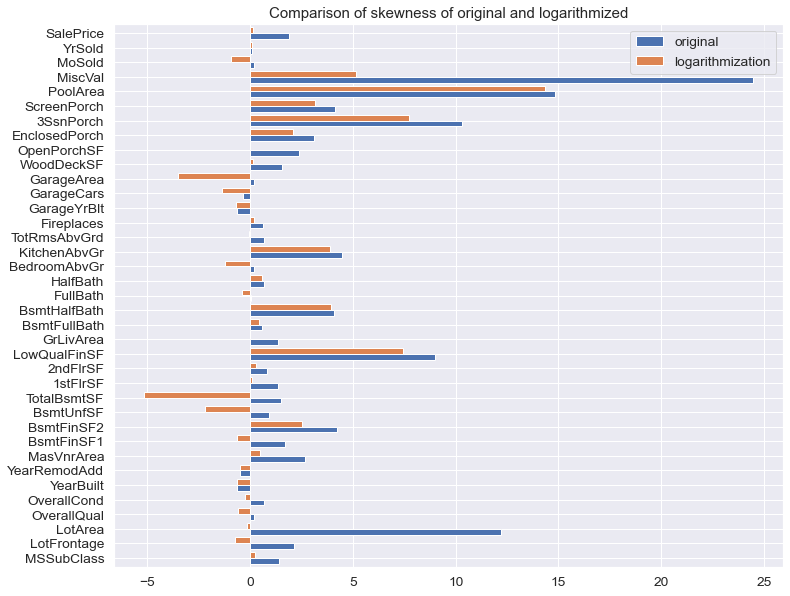

In [81]:
# compare skewness before with after of logarithmization
from scipy.stats import skew
skewness = pd.concat([num_data.apply(lambda x: skew(x.dropna())),
                      log_num_data.apply(lambda x: skew(x.dropna()))],
                     axis=1).rename(columns={0:'original', 1:'logarithmization'})
skewness.plot.barh(figsize=(12,10), title='Comparison of skewness of original and logarithmized', width=0.8);

In [82]:
cat_data.shape, num_data.shape

((1460, 209), (1460, 37))

In [83]:
print(cat_data.isna().sum().sum(), num_data.isna().sum().sum())

0 348


In [84]:
# merge categorical and numeric columns
optimized_data = pd.concat([data['Id'], cat_data, log_num_data], axis=1)
optimized_data.head(1)

,Id,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,0,0,1,0,1,0,0,0,1,...,0.0,4.127134,0.0,0.0,0.0,0.0,0.0,1.098612,7.605392,12.247699


In [85]:
optimized_data = optimized_data.drop(['LotFrontage','GarageYrBlt'], axis=1)
optimized_data = optimized_data.dropna()
optimized_data.shape

(1452, 245)

In [86]:
X = optimized_data.drop(['Id', 'SalePrice'], axis=1)
y = optimized_data['SalePrice']

In [87]:
# split data into train and test
np.random.seed(17)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
print(model.score(X_test, y_test))

0.8462780407407033
